In [199]:
import pandas as pd
import matplotlib.pylab as plt

In [200]:
#filename = "start_df.csv"
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [201]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Read the data and show it

In [202]:
df = pd.read_csv(filename, names = headers)

In [203]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

Get rid of "?" by changing them to NaNs (u'll see why later)

In [204]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

Show the missing data. If missing it marks it as "false"

In [205]:
missing_data = df.isnull()
missing_data.head(5)

symboling  normalized-losses   make  fuel-type  aspiration  num-of-doors  \
0      False               True  False      False       False         False   
1      False               True  False      False       False         False   
2      False               True  False      False       False         False   
3      False              False  False      False       False         False   
4      False              False  False      False       False         False   

   body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0       False         False            False       False  ...        False   
1       False         False            False       False  ...        False   
2       False         False            False       False  ...        False   
3       False         False            False       False  ...        False   
4       False         False            False       False  ...        False   

   fuel-system   bore  stroke  compression-ratio  horsepower  peak-rpm  \
0        False  False   False              False       False     False   
1        False  False   False              False       False     False   
2        False  False   False              False       False     False   
3        False  False   False              False       False     False   
4        False  False   False              False       False     False   

   city-mpg  highway-mpg  price  
0     False        False  False  
1     False        False  False  
2     False        False  False  
3     False        False  False  
4     False        False  False  

[5 rows x 26 columns]

In [206]:
# count and show the missing ones
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [207]:
# show the column average of normalized losses
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [208]:
# replace the NaNs with the average value of that column
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [209]:
# do same stuff with bore, stroke, hp, rpm etc
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


In [210]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

In [211]:
avg_stroke = df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan, avg_stroke, inplace=True)

In [212]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


In [213]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [214]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


In [215]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [216]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [217]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [218]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [219]:
# simply drop whole row with NaN in "price" column because thats our target, we cant use it to predict the price if it doesnt even have the price attached
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [220]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               122  alfa-romero       gas        std          two   
1          3               122  alfa-romero       gas        std          two   
2          1               122  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [221]:
# check the types
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [222]:
# theres a bunch of "object" types for values that should clearly be numbers, like the price, and we dont like that, we want numbers, so here we change the types
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [223]:
df.dtypes
# ahhh much better

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [224]:
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3                122  alfa-romero       gas        std   
1          3                122  alfa-romero       gas        std   
2          1                122  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0        111   
1          130         mpfi  3.47    2.68               9.0        111   
2          152         mpfi  2.68    3.47               9.0        154   
3          109         mpfi  3.19    3.40              10.0        102   
4          136         mpfi  3.19    3.40               8.0        115   

   peak-rpm city-mpg  highway-mpg    price  
0    5000.0       21           27  13495.0  
1    5000.0       21           27  16500.0  
2    5000.0       19           26  16500.0  
3    5500.0       24           30  13950.0  
4    5500.0       18           22  17450.0  

[5 rows x 26 columns]

Standardize the data

In [225]:
# Convert mpg to L/100km as 235 divided by mpg because metric
df['city-L/100km'] = 235/df["city-mpg"]

# check data 
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3                122  alfa-romero       gas        std   
1          3                122  alfa-romero       gas        std   
2          1                122  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   fuel-system  bore  stroke  compression-ratio horsepower peak-rpm  city-mpg  \
0         mpfi  3.47    2.68                9.0        111   5000.0        21   
1         mpfi  3.47    2.68                9.0        111   5000.0        21   
2         mpfi  2.68    3.47                9.0        154   5000.0        19   
3         mpfi  3.19    3.40               10.0        102   5500.0        24   
4         mpfi  3.19    3.40                8.0        115   5500.0        18   

  highway-mpg    price  city-L/100km  
0          27  13495.0     11.190476  
1          27  16500.0     11.190476  
2          26  16500.0     12.368421  
3          30  13950.0      9.791667  
4          22  17450.0     13.055556  

[5 rows x 27 columns]

In [226]:
df['highway-L/100km'] = 235/df["highway-mpg"]

Normalize the data

In [227]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [228]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Do some binning to show off visualization skills

Text(0.5, 1.0, 'horsepower bins')

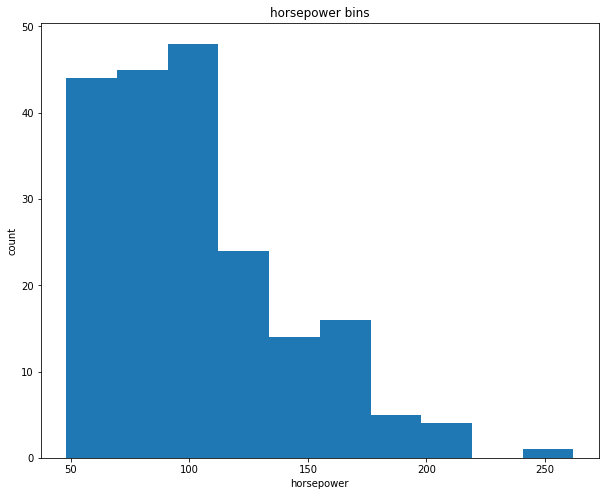

In [229]:
%matplotlib inline
import matplotlib.pyplot as plt
width = 10 # we want a nice big graph
height = 8

plt.figure(figsize=(width, height))
plt.hist(df["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [230]:
# make 3 bins by placing 4 dividers
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [231]:
# pretty self-explanatory
group_names = ['Low', 'Medium', 'High']

In [232]:
# "cut" the horsepower into bins ans show
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

horsepower horsepower-binned
0          111               Low
1          111               Low
2          154            Medium
3          102               Low
4          115               Low
5          110               Low
6          110               Low
7          110               Low
8          140            Medium
9          101               Low
10         101               Low
11         121            Medium
12         121            Medium
13         121            Medium
14         182            Medium
15         182            Medium
16         182            Medium
17          48               Low
18          70               Low
19          70               Low

In [233]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Some more visuals

Text(0.5, 1.0, 'horsepower bins')

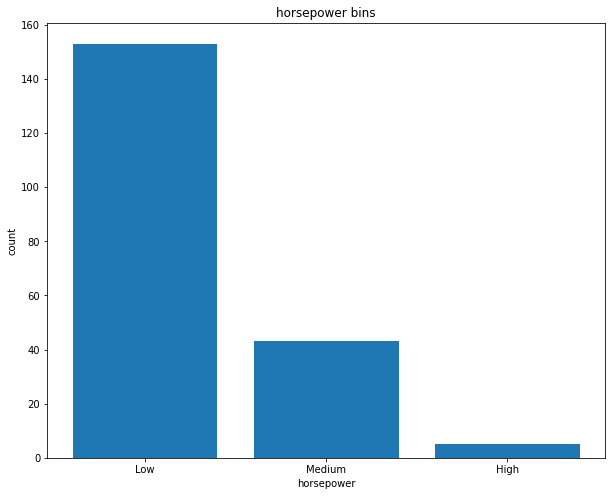

In [234]:
plt.figure(figsize=(width, height))
plt.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

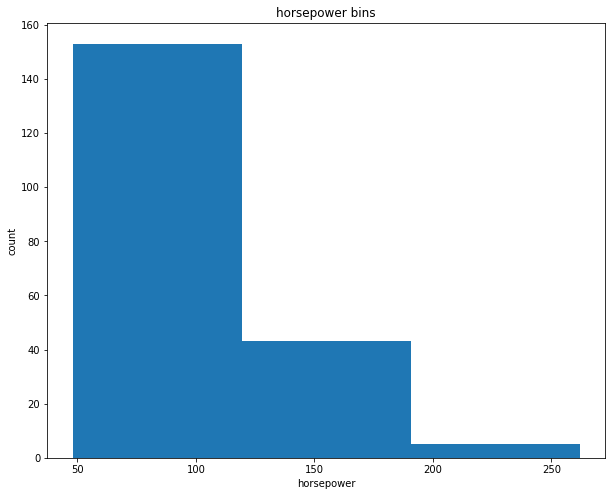

In [235]:
a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.figure(figsize=(width, height))
plt.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

Lets make some dummy variables (a lot like one-hot-encoding)

In [236]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [237]:
# get the dummies and place them in a df
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

diesel  gas
0       0    1
1       0    1
2       0    1
3       0    1
4       0    1

In [238]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [239]:
df.head()

symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   horsepower  peak-rpm  city-mpg highway-mpg    price  city-L/100km  \
0         111    5000.0        21          27  13495.0     11.190476   
1         111    5000.0        21          27  16500.0     11.190476   
2         154    5000.0        19          26  16500.0     12.368421   
3         102    5500.0        24          30  13950.0      9.791667   
4         115    5500.0        18          22  17450.0     13.055556   

  highway-L/100km  horsepower-binned  diesel  gas  
0        8.703704                Low       0    1  
1        8.703704                Low       0    1  
2        9.038462             Medium       0    1  
3        7.833333                Low       0    1  
4       10.681818                Low       0    1  

[5 rows x 30 columns]

In [240]:
# same stuff with aspiration
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()

aspiration-std  aspiration-turbo
0               1                 0
1               1                 0
2               1                 0
3               1                 0
4               1                 0

In [241]:
# place it in "df"
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column from "df"
df.drop("aspiration", axis = 1, inplace=True)

In [242]:
# save the nice clean dataset
df.to_csv('clean_df.csv')

In [243]:
import seaborn as sns
%matplotlib inline

Lets do some visualization of the clean data

In [244]:
# list the data types
print(df.dtypes)

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100km          float64
highway-L/100km       float64
horsepower-binned    category
diesel                  uint8
gas                     uint8
aspiration-std          uint8
aspiration-turbo        uint8
dtype: object


In [245]:
# lets look at the correlations
df.corr()

symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.466264   -0.535987 -0.365404   
normalized-losses   0.466264           1.000000   -0.056661  0.019424   
wheel-base         -0.535987          -0.056661    1.000000  0.876024   
length             -0.365404           0.019424    0.876024  1.000000   
width              -0.242423           0.086802    0.814507  0.857170   
height             -0.550160          -0.373737    0.590742  0.492063   
curb-weight        -0.233118           0.099404    0.782097  0.880665   
engine-size        -0.110581           0.112360    0.572027  0.685025   
bore               -0.140019          -0.029862    0.493244  0.608971   
stroke             -0.008153           0.055045    0.158018  0.123952   
compression-ratio  -0.182196          -0.114713    0.250313  0.159733   
horsepower          0.075810           0.217300    0.371178  0.579795   
peak-rpm            0.279740           0.239543   -0.360305 -0.285970   
city-mpg           -0.035527          -0.225016   -0.470606 -0.665192   
highway-mpg         0.036233          -0.181877   -0.543304 -0.698142   
price              -0.082391           0.133999    0.584642  0.690628   
city-L/100km        0.066171           0.238567    0.476153  0.657373   
highway-L/100km    -0.029807           0.181189    0.577576  0.707108   
diesel             -0.196735          -0.101546    0.307237  0.211187   
gas                 0.196735           0.101546   -0.307237 -0.211187   
aspiration-std      0.054615           0.006911   -0.256889 -0.230085   
aspiration-turbo   -0.054615          -0.006911    0.256889  0.230085   

                      width    height  curb-weight  engine-size      bore  \
symboling         -0.242423 -0.550160    -0.233118    -0.110581 -0.140019   
normalized-losses  0.086802 -0.373737     0.099404     0.112360 -0.029862   
wheel-base         0.814507  0.590742     0.782097     0.572027  0.493244   
length             0.857170  0.492063     0.880665     0.685025  0.608971   
width              1.000000  0.306002     0.866201     0.729436  0.544885   
height             0.306002  1.000000     0.307581     0.074694  0.180449   
curb-weight        0.866201  0.307581     1.000000     0.849072  0.644060   
engine-size        0.729436  0.074694     0.849072     1.000000  0.572609   
bore               0.544885  0.180449     0.644060     0.572609  1.000000   
stroke             0.188822 -0.060663     0.167438     0.205928 -0.055390   
compression-ratio  0.189867  0.259737     0.156433     0.028889  0.001263   
horsepower         0.615056 -0.087001     0.757981     0.822668  0.566903   
peak-rpm          -0.245800 -0.309974    -0.279361    -0.256733 -0.267392   
city-mpg          -0.633531 -0.049800    -0.749543    -0.650546 -0.582027   
highway-mpg       -0.680635 -0.104812    -0.794889    -0.679571 -0.591309   
price              0.751265  0.135486     0.834415     0.872335  0.543155   
city-L/100km       0.673363  0.003811     0.785353     0.745059  0.554610   
highway-L/100km    0.736728  0.084301     0.836921     0.783465  0.559112   
diesel             0.244356  0.281578     0.221046     0.070779  0.054458   
gas               -0.244356 -0.281578    -0.221046    -0.070779 -0.054458   
aspiration-std    -0.305732 -0.090336    -0.321955    -0.110040 -0.227816   
aspiration-turbo   0.305732  0.090336     0.321955     0.110040  0.227816   

                     stroke  ...  peak-rpm  city-mpg  highway-mpg     price  \
symboling         -0.008153  ...  0.279740 -0.035527     0.036233 -0.082391   
normalized-losses  0.055045  ...  0.239543 -0.225016    -0.181877  0.133999   
wheel-base         0.158018  ... -0.360305 -0.470606    -0.543304  0.584642   
length             0.123952  ... -0.285970 -0.665192    -0.698142  0.690628   
width              0.188822  ... -0.245800 -0.633531    -0.680635  0.751265   
height            -0.060663  ... -0.309974 -0.049800    -0.104812  0.135486   
curb-weight   

In [246]:
# now just correlation between bore, stroke etc..
df_temp = df[['bore','stroke' ,'compression-ratio','horsepower']]
df_temp.corr()

bore    stroke  compression-ratio  horsepower
bore               1.000000 -0.055390           0.001263    0.566903
stroke            -0.055390  1.000000           0.187871    0.098128
compression-ratio  0.001263  0.187871           1.000000   -0.214489
horsepower         0.566903  0.098128          -0.214489    1.000000

For continuous variables we'll do some regression plots

<AxesSubplot:xlabel='engine-size', ylabel='price'>

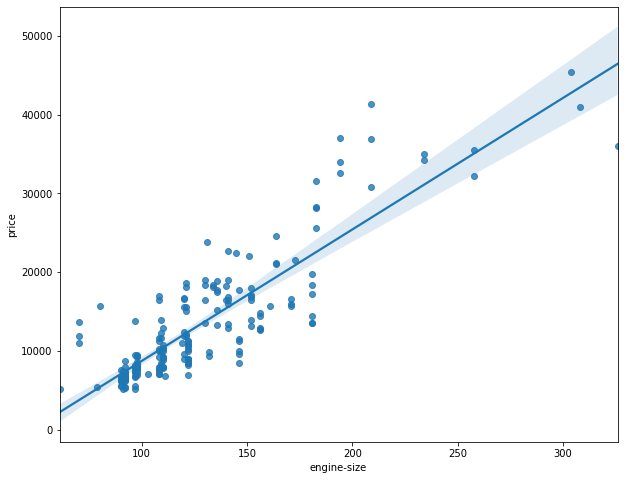

In [247]:
# engine size as potential predictor variable of price
plt.figure(figsize=(width, height))
sns.regplot(x="engine-size", y="price", data=df)
#plt.ylim(0,)

In [248]:
# this is a good idea becase the correlation is huuge
df[["engine-size", "price"]].corr()

engine-size     price
engine-size     1.000000  0.872335
price           0.872335  1.000000

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

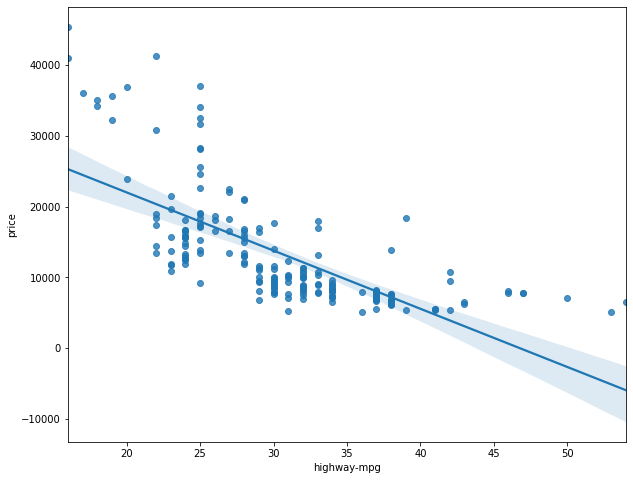

In [249]:
# lets do the same for miles per gallon
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)

In [250]:
# aand the correlation
df[['highway-mpg', 'price']].corr()

highway-mpg     price
highway-mpg     1.000000 -0.704692
price          -0.704692  1.000000

Both of these are great...so lets see one that's not

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

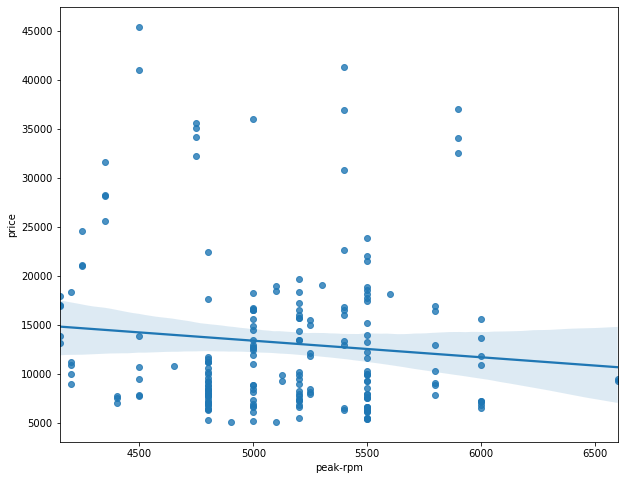

In [251]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)

In [252]:
df[['peak-rpm','price']].corr()

peak-rpm     price
peak-rpm  1.000000 -0.101616
price    -0.101616  1.000000

Okay, now moving on to visualizing categorical variables with some box plots

<AxesSubplot:xlabel='body-style', ylabel='price'>

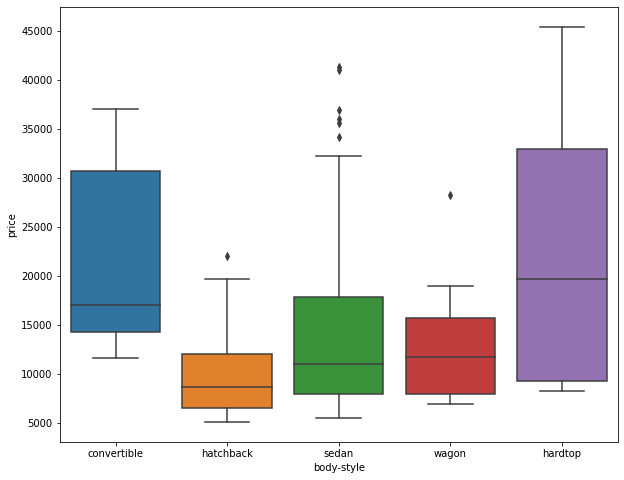

In [253]:
# first, lets see how the price is distributed for different body types
plt.figure(figsize=(width, height))
sns.boxplot(x="body-style", y="price", data=df)

Clearly not a great predictor of price, there's a lot of overlap

<AxesSubplot:xlabel='engine-location', ylabel='price'>

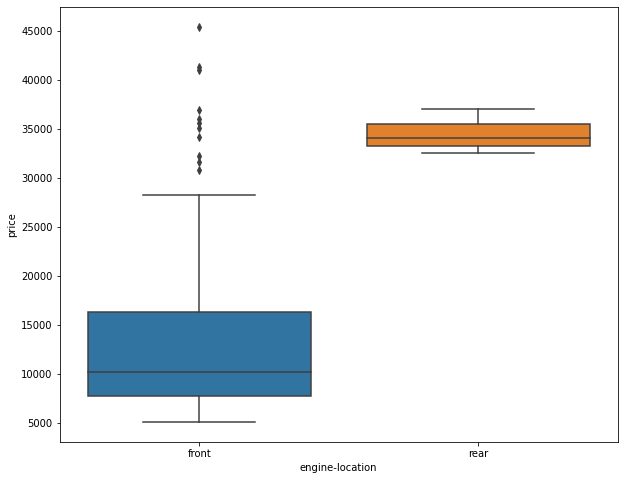

In [254]:
# now lets see the engine locations
plt.figure(figsize=(width, height))
sns.boxplot(x="engine-location", y="price", data=df)

Okay, a much better predictor, only a few outlayers overlap

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

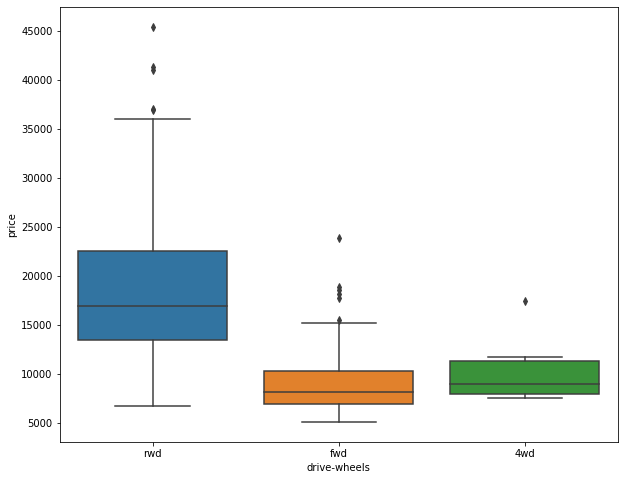

In [255]:
# these are pretty, lets do another: drive-wheels
plt.figure(figsize=(width, height))
sns.boxplot(x="drive-wheels", y="price", data=df)

Good. Now lets do some statistical analysis to describe the dataset

In [256]:
df.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  201.000000          201.00000  201.000000  201.000000  201.000000   
mean     0.840796          122.00000   98.797015    0.837102    0.915126   
std      1.254802           31.99625    6.066366    0.059213    0.029187   
min     -2.000000           65.00000   86.600000    0.678039    0.837500   
25%      0.000000          101.00000   94.500000    0.801538    0.890278   
50%      1.000000          122.00000   97.000000    0.832292    0.909722   
75%      2.000000          137.00000  102.400000    0.881788    0.925000   
max      3.000000          256.00000  120.900000    1.000000    1.000000   

           height  curb-weight  engine-size        bore      stroke  ...  \
count  201.000000   201.000000   201.000000  201.000000  201.000000  ...   
mean     0.899108  2555.666667   126.875622    3.330692    3.256874  ...   
std      0.040933   517.296727    41.546834    0.268072    0.316048  ...   
min      0.799331  1488.000000    61.000000    2.540000    2.070000  ...   
25%      0.869565  2169.000000    98.000000    3.150000    3.110000  ...   
50%      0.904682  2414.000000   120.000000    3.310000    3.290000  ...   
75%      0.928094  2926.000000   141.000000    3.580000    3.410000  ...   
max      1.000000  4066.000000   326.000000    3.940000    4.170000  ...   

          peak-rpm    city-mpg  highway-mpg         price  city-L/100km  \
count   201.000000  201.000000   201.000000    201.000000    201.000000   
mean   5117.665368   25.179104    30.686567  13207.129353      9.944145   
std     478.113805    6.423220     6.815150   7947.066342      2.534599   
min    4150.000000   13.000000    16.000000   5118.000000      4.795918   
25%    4800.000000   19.000000    25.000000   7775.000000      7.833333   
50%    5125.369458   24.000000    30.000000  10295.000000      9.791667   
75%    5500.000000   30.000000    34.000000  16500.000000     12.368421   
max    6600.000000   49.000000    54.000000  45400.000000     18.076923   

       highway-L/100km      diesel         gas  aspiration-std  \
count       201.000000  201.000000  201.000000      201.000000   
mean          8.044957    0.099502    0.900498        0.820896   
std           1.840739    0.300083    0.300083        0.384397   
min           4.351852    0.000000    0.000000        0.000000   
25%           6.911765    0.000000    1.000000        1.000000   
50%           7.833333    0.000000    1.000000        1.000000   
75%           9.400000    0.000000    1.000000        1.000000   
max          14.687500    1.000000    1.000000        1.000000   

       aspiration-turbo  
count        201.000000  
mean           0.179104  
std            0.384397  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000  

[8 rows x 22 columns]

So this shows us the mean, standard deviation, mins, maxes and IQR, but skips the "object" variables, so lets see those as well

In [257]:
df.describe(include=['object'])

make num-of-doors body-style drive-wheels engine-location  \
count      201          201        201          201             201   
unique      22            2          5            3               2   
top     toyota         four      sedan          fwd           front   
freq        32          115         94          118             198   

       engine-type num-of-cylinders fuel-system  
count          201              201         201  
unique           6                7           8  
top            ohc             four        mpfi  
freq           145              157          92

Okaay, onwards to some modeling..First we'll do some basic linear regression

In [258]:
from sklearn.linear_model import LinearRegression

In [259]:
# tadaa
lm = LinearRegression()
lm

LinearRegression()

Now lets see how well highway mph predicts price(Spoiler alert: not great)

In [260]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

So now we can get the intercept and slope. Yhat = intercept + slope*X

In [261]:
intercept = lm.intercept_
slope = lm.coef_
print("The intercept iis: " + str(intercept) + " and the slope: " + str(slope))

The intercept iis: 38423.3058581574 and the slope: [-821.73337832]


So the formula is PredictedPrice = 38423.3 + (-821.7*highway-mph)

Now lets try using multiple variables to predict the price, aka multiple linear regression

In [262]:
# we'll use horsepower, engine size and highway mph, they sound like good indicators, but bad enough to be interesting
Z1 = df[['horsepower', 'engine-size', 'highway-mpg']]
# do the fit to price
lm.fit(Z1, df['price'])
# get the intercepts
intercept_multi = lm.intercept_
# aand get the slopes
slopes_multi = lm.coef_

The fomula is 𝑌ℎ𝑎𝑡= 𝑎 + 𝑏1𝑋1 + 𝑏2𝑋2 + 𝑏3𝑋3 + bnXn where the n is the number that... u get it

In [263]:
intercept_multi

-2109.8865164269573

In [264]:
slopes_multi

array([  41.21082164,  120.8372717 , -139.33165207])

Now this was great, but the numbers are exhausting to look at when you're dealing with things at scale, so lets get some visuals

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

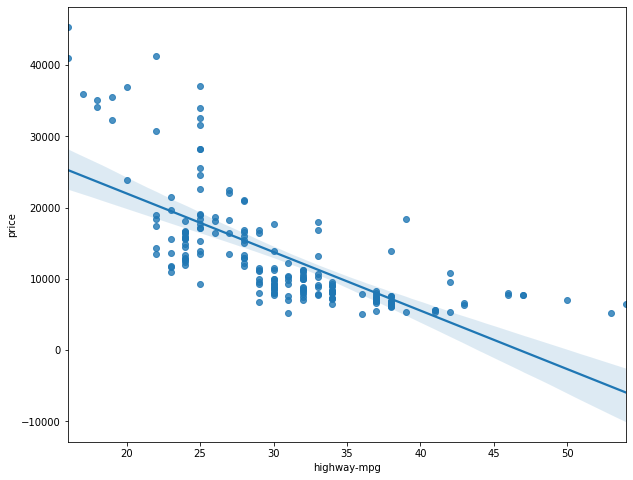

In [265]:
from sklearn.metrics import mean_squared_error as mserror
import matplotlib.pyplot as plt
%matplotlib inline 
# we dont have to do things by hand like we did above, basic linear regression is included in the regplot plotting...the hint was in the name.
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)

Its a negative correlation(sloping down), and there's a lot of scatter(high variance), so not great. This was pretty basic so lets see plots for the multiple regression. Now, we cant directly plot them with things like regplot, so we're going to plot the predictions and actual values and see how well we did.

In [266]:
# first lets make a function for plotting it
def PlotCompare(predictions):
    plt.figure(figsize=(width, height))


    ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
    sns.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax1)


    plt.title('Actual vs Fitted Values for Price')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [267]:
# we have that Z1 up there that used horsepower, engine size and highway-mph, so lets use those, they seem promising
Yhat_multi1 = lm.predict(Z1)
Z1

horsepower  engine-size  highway-mpg
0           111          130           27
1           111          130           27
2           154          152           26
3           102          109           30
4           115          136           22
..          ...          ...          ...
196         114          141           28
197         160          141           25
198         134          173           23
199         106          145           27
200         114          141           25

[201 rows x 3 columns]

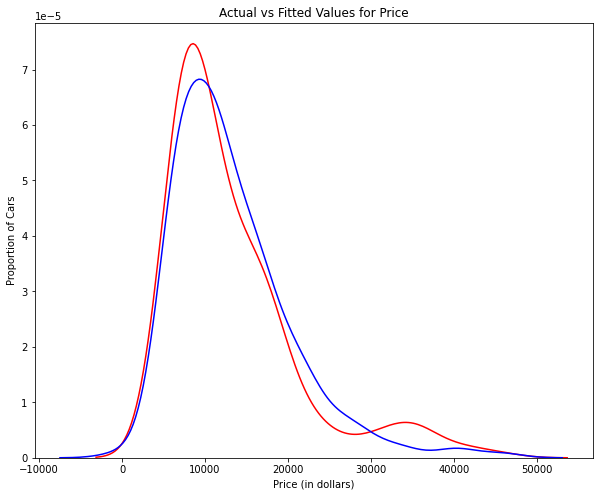

In [268]:
# lets make the plot for Yhat_multi first
mse1 = mserror(df['price'], Yhat_multi1) # calculate mean square error so we have a concrete basis for comparison
PlotCompare(Yhat_multi1)

In [269]:
# lets use some less optimal ones to demonstrate the difference
Z2 = df[['horsepower', 'wheel-base', 'length']]
lm.fit(Z2, df['price'])
Z2

horsepower  wheel-base    length
0           111        88.6  0.811148
1           111        88.6  0.811148
2           154        94.5  0.822681
3           102        99.8  0.848630
4           115        99.4  0.848630
..          ...         ...       ...
196         114       109.1  0.907256
197         160       109.1  0.907256
198         134       109.1  0.907256
199         106       109.1  0.907256
200         114       109.1  0.907256

[201 rows x 3 columns]

In [270]:
Yhat_multi2 = lm.predict(Z2) # make the prediction
mse2 = mserror(df['price'], Yhat_multi2)

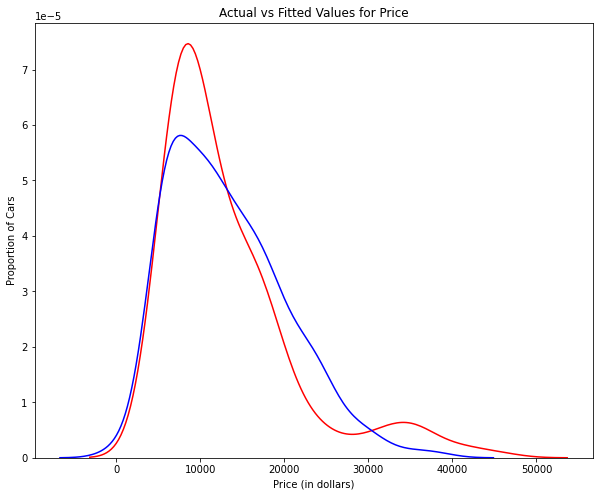

In [271]:
# now make the plot for Y_hat
PlotCompare(Yhat_multi2)

So, this one is clearly worse... Lets see what happens when we use more than 3 variables to predict

In [272]:
Z3 = df[['horsepower', 'engine-size', 'highway-mpg', 'wheel-base', 'length', 'city-mpg', 'normalized-losses', 'engine-size', 'curb-weight']]
lm.fit(Z3, df['price'])
Yhat_multi3 = lm.predict(Z3) # make the prediction

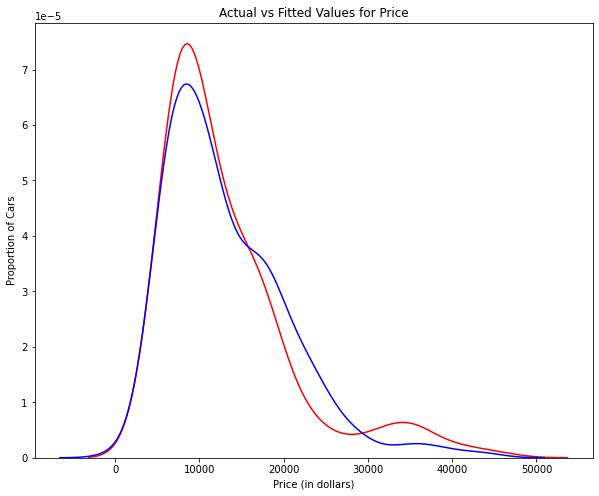

In [273]:
# and lets make the plot
mse3 = mserror(df['price'], Yhat_multi3)
PlotCompare(Yhat_multi3)

Well, all of these are interesting, but lets look at the mse numbers and see how each of them performed.

In [274]:
# now lets see the errors for each model respectively
print("MSE for attempt 1: ", mse1/10000)
print("MSE for attempt 2: ", mse2/10000)
print("MSE for attempt 3: ", mse3/10000)

MSE for attempt 1:  1306.125354780555
MSE for attempt 2:  1576.2493052131254
MSE for attempt 3:  1176.3730676132334


Looks like the last one gives the best results.

Maybe straight lines arent the way to go. Polynomial regression goes brr

In [275]:
# first lets write a plotting function for the polly one

def PlotPolly(model, independent_variable, dependent_variabble, Name):

    plt.figure(figsize=(width, height))
    
    column = df[Name]
    max_value = column.max()
    x_new = np.linspace(0, max_value, max_value)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plot_name = "Polynomial Fit for Price ~ " + Name
    plt.title(plot_name)
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

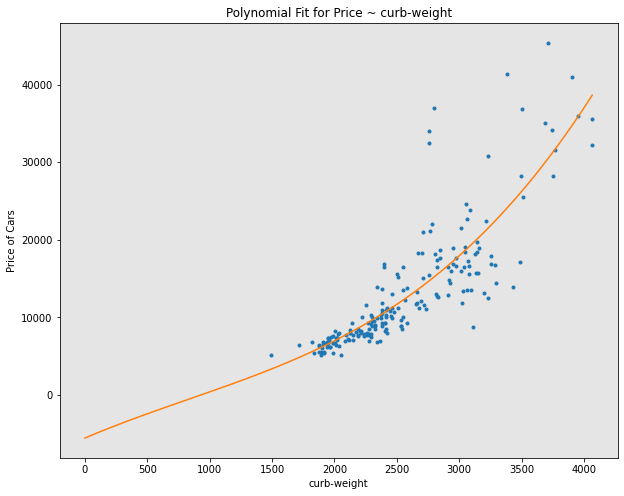

17591002.68122231

In [276]:
x = df['curb-weight']
y = df['price']
# here we use a polynomial of the 3rd order(cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f) #show the poly function
mse_poly1 = mserror(df['price'], p(x))

# now lets use our plotting function
PlotPolly(p, x, y, 'curb-weight')

# aand lets check the mean square error
mse_poly1

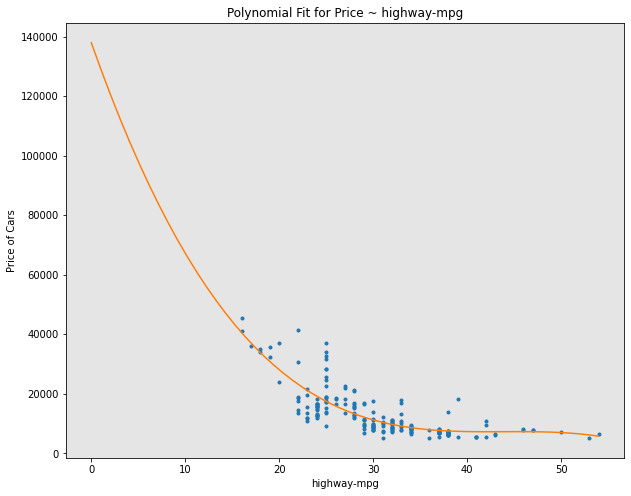

20474146.426361218

In [277]:
x = df['highway-mpg']
y = df['price']
# here we use a polynomial of the 3rd order(cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f) #show the poly function
mse_poly2 = mserror(df['price'], p(x))

# now lets use our plotting function
PlotPolly(p, x, y, 'highway-mpg')

# aand lets check the mean square error
mse_poly2

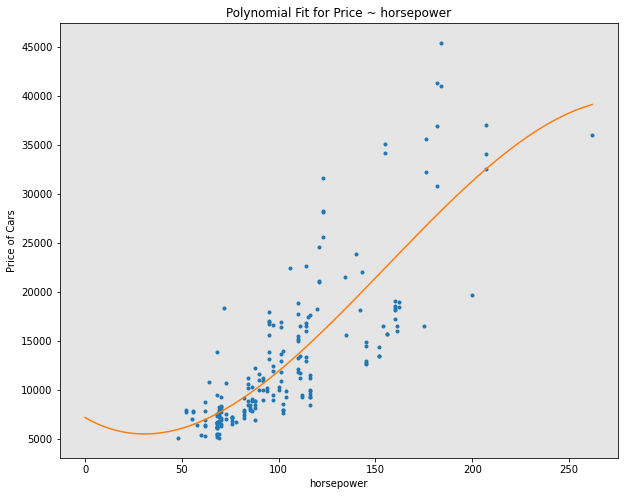

21188322.500872314

In [278]:
x = df['horsepower']
y = df['price']
# here we use a polynomial of the 3rd order(cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f) #show the poly function
mse_poly3 = mserror(df['price'], p(x))

# now lets use our plotting function
PlotPolly(p, x, y, 'horsepower')

# aand lets check the mean square error
mse_poly3

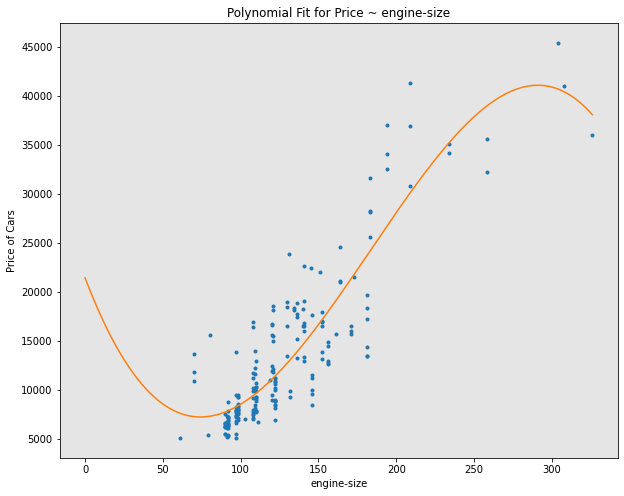

13187054.245011818

In [279]:
x = df['engine-size']
y = df['price']
# here we use a polynomial of the 3rd order(cubic) 
f = np.polyfit(x, y, 4)
p = np.poly1d(f) #show the poly function
mse_poly4 = mserror(df['price'], p(x))

# now lets use our plotting function
PlotPolly(p, x, y, 'engine-size')

# aand lets check the mean square error
mse_poly4

In [280]:
# now lets see the errors for each model respectively
print("MSE for attempt 1: ", mse1/10000)
print("MSE for attempt 2: ", mse2/10000)
print("MSE for attempt 3: ", mse3/10000)
print("MSE for Poly attempt 1: ", mse_poly1/10000)
print("MSE for Poly attempt 2: ", mse_poly2/10000)
print("MSE for Poly attempt 3: ", mse_poly3/10000)
print("MSE for Poly attempt 4: ", mse_poly4/10000)

MSE for attempt 1:  1306.125354780555
MSE for attempt 2:  1576.2493052131254
MSE for attempt 3:  1176.3730676132334
MSE for Poly attempt 1:  1759.1002681222308
MSE for Poly attempt 2:  2047.4146426361217
MSE for Poly attempt 3:  2118.8322500872314
MSE for Poly attempt 4:  1318.7054245011818


Okay, well that was a bit of fun exploration, but its quite tedious and not very systematic. Lets do some proper model building and comparing 

In [281]:
# First, some plotting functions
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [282]:
from sklearn.model_selection import train_test_split
y_data = df['price'] # Define the target
x_data = df.drop('price',axis=1) # Remove price from data

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1) # Split data into 15% test and 75% train

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 170


In [283]:
# Create linear regression object
lre = LinearRegression()
# Fit model using horsepower
lre.fit(x_train[['horsepower']], y_train)
# Do some R^2 scoring
score_train = lre.score(x_train[['horsepower']], y_train)
score_test = lre.score(x_test[['horsepower']], y_test)

print("Score train data: ", score_train)
print("Score test data: ", score_test)

Score train data:  0.6450110239384647
Score test data:  0.7076967079117262


Okay, now lets do multiple again

In [284]:
Mlre = LinearRegression()
Mlre.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

# Make some predictions using training data
yhat_train = Mlre.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

# Make some predictions using test data
yhat_test = Mlre.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [285]:
yhat_train[0:5]

array([11927.25153792, 11236.70125955,  6436.82274615, 21891.09897761,
       16669.10119352])

In [286]:
yhat_test[0:5]

array([11349.48964574,  5914.6130239 , 11243.35261505,  6661.95904136,
       15555.94734434])

Okay, now lets visualize to see how well we did

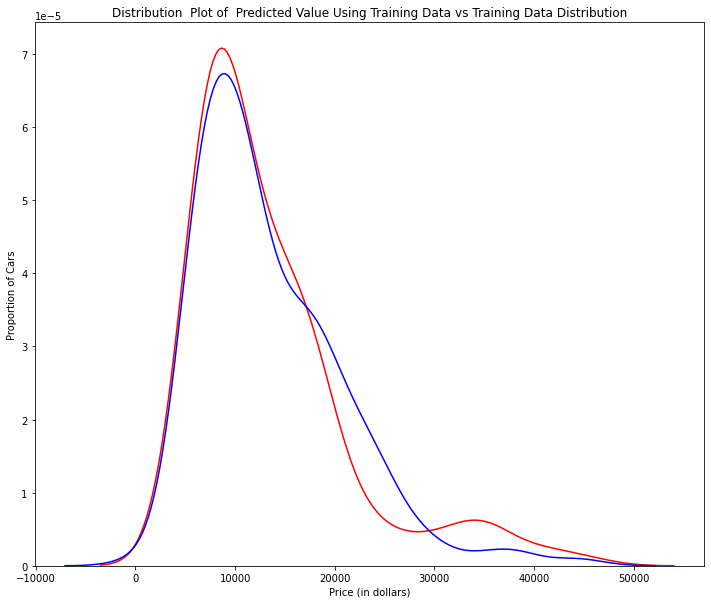

In [287]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Okaaay, not bad at all, but we expected this after the previous attempts, and this just shows us the model is learning from the train data...How about the unseen test data?

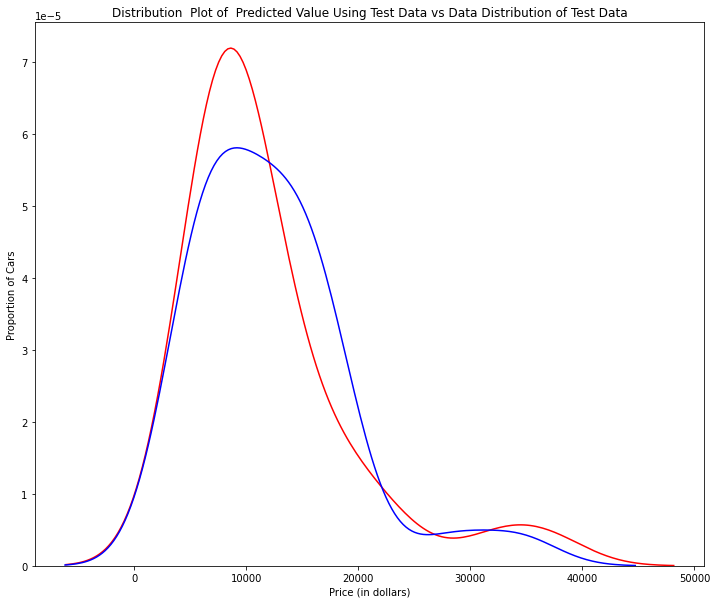

In [288]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

WAH WAH WAaAh

Lets see how poly does...

In [289]:
from sklearn.preprocessing import PolynomialFeatures
# Split the dataset again, but give a bit more to the testing data, lets see what happens
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=0)

# Again, make the poly model and do the transformation(the choice to pick such a high degree for the poly is just to demonstrate some overfitting)
pr = PolynomialFeatures(degree=7)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])

# Now make the model and train it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

# Make some predictions
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 7399.20281828,  7366.24395547, 10303.0337993 , 17671.24104863,
       18402.38342432])

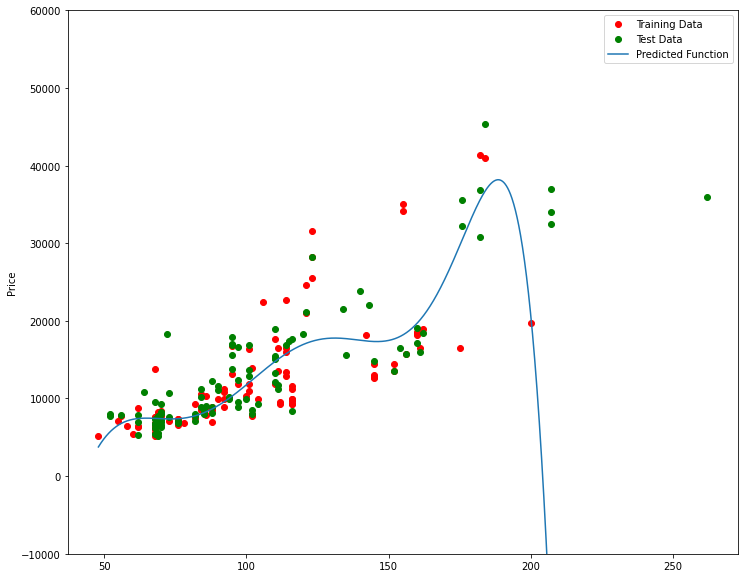

In [290]:
# And lets plot our results
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Well it certainly looks a bit overfit...Lets check

In [291]:
# R^2 of the training data, pretty standard
poly.score(x_train_pr, y_train)

0.6238695095169748

In [292]:
# R^2 of the training data
poly.score(x_test_pr, y_test)

-3790.984045126587

Hahaahaha, okay we're definitely overfitting. Huge negative...

Now lets play with the values, but in a more efficient way

Text(0.5, 1.0, 'R^2 Using Test Data')

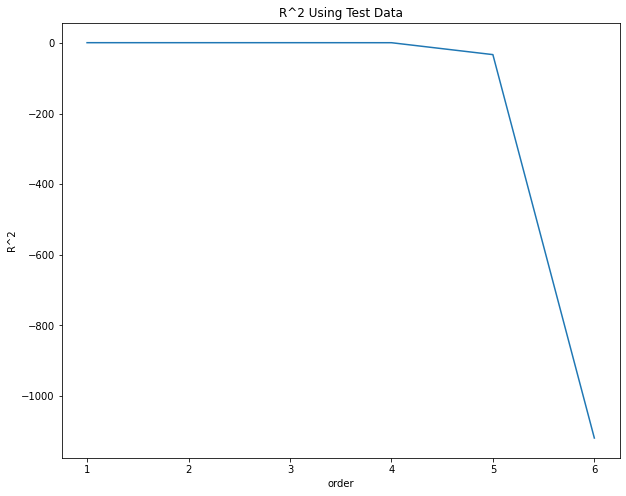

In [293]:
# First lets see which poly order is best for 'horsepower' 
Rsqu_test = []

order = [1, 2, 3, 4, 5, 6]
for n in order:
    pr = PolynomialFeatures(degree=n)
    lr = LinearRegression()

    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.figure(figsize=(width, height))
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')  

Looks like 3 works best, but lets do some more thorough analysis

In [294]:
ar_skvers = []
# Lets streamline the testing to speed it up
def go_crazy(order, test_data, feature, ordinal):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)

    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[[feature]])
    x_test_pr = pr.fit_transform(x_test[[feature]])

    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    ar_skvers.append(poly.score(x_test_pr, y_test))

    Title = 'Combination: ' + str(order) + ' --- ' + str(test_data) + ' --- ' + feature + '          Ordinal ::::::: ' + str(ordinal)
    plt.title(Title)
    PollyPlot(x_train[[feature]], x_test[[feature]], y_train,y_test, poly, pr)

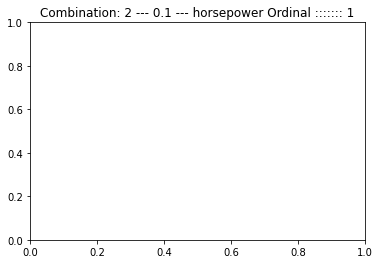

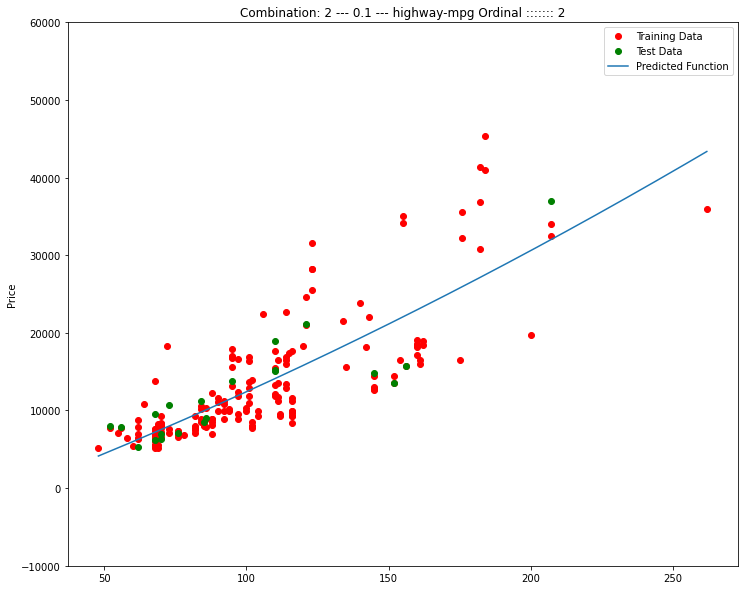

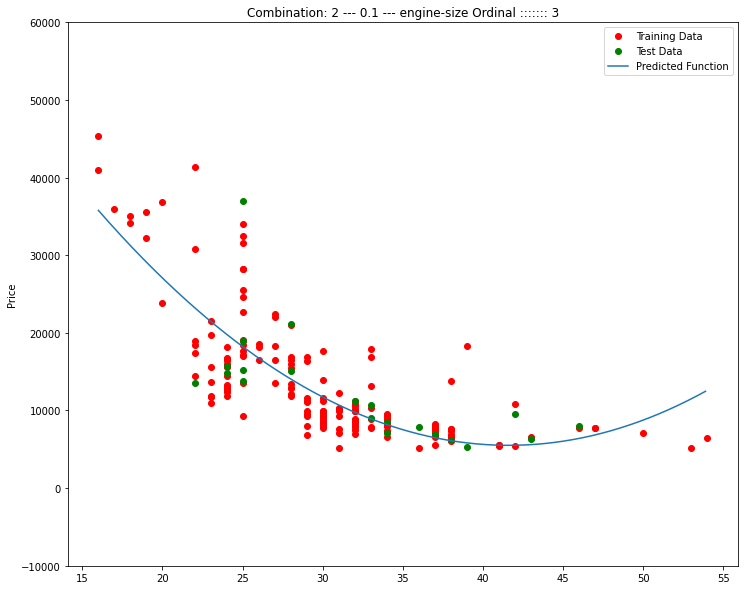

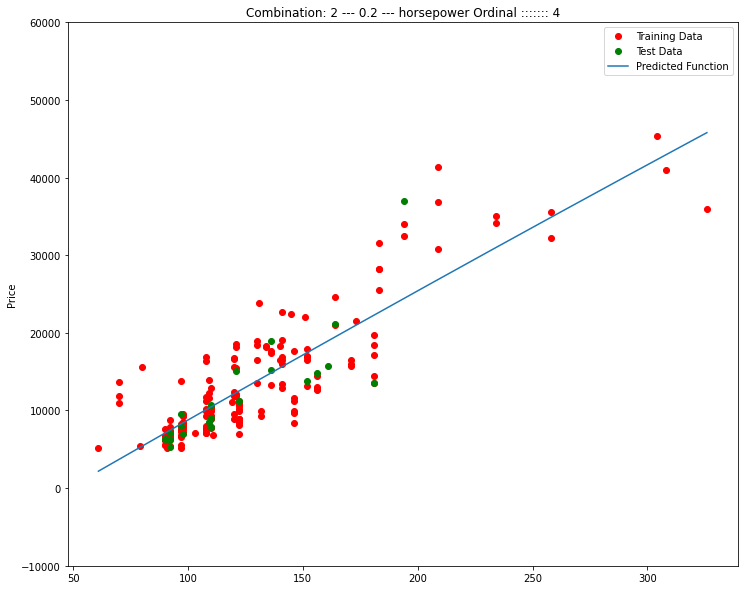

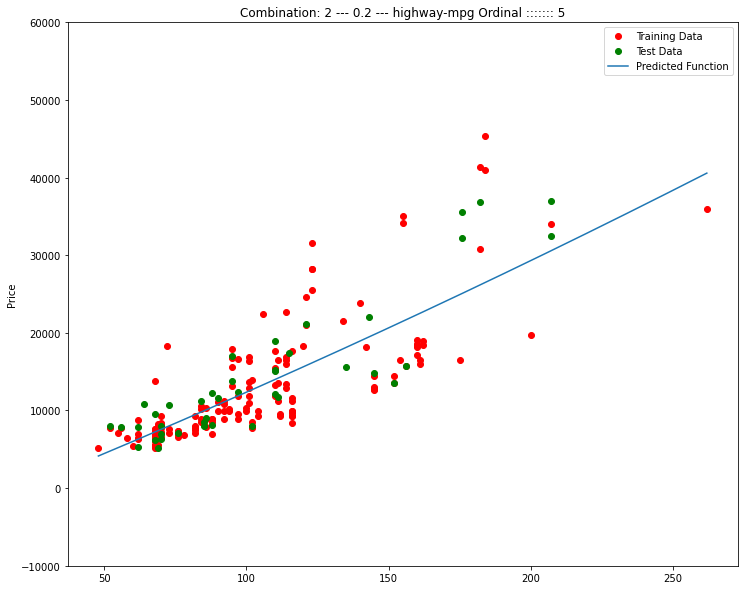

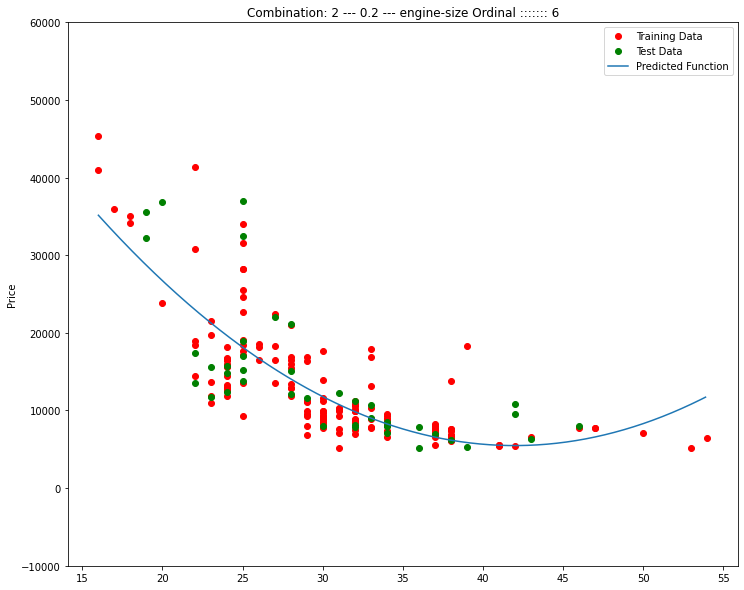

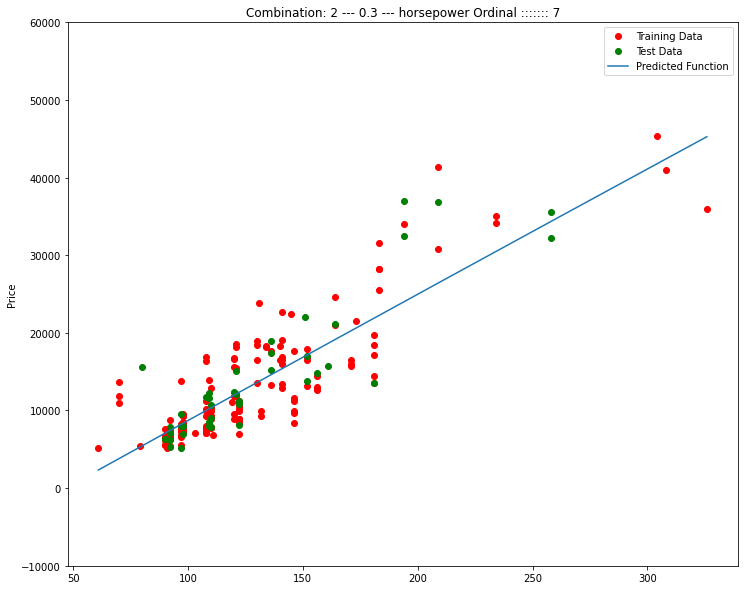

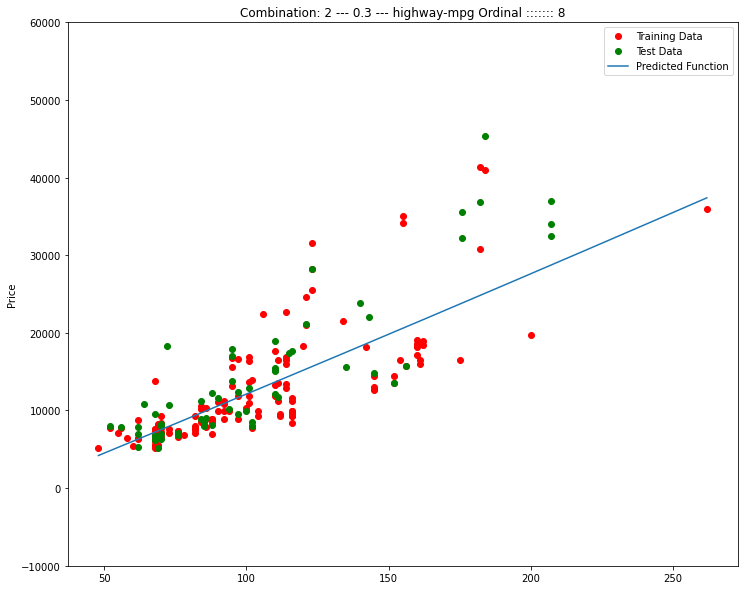

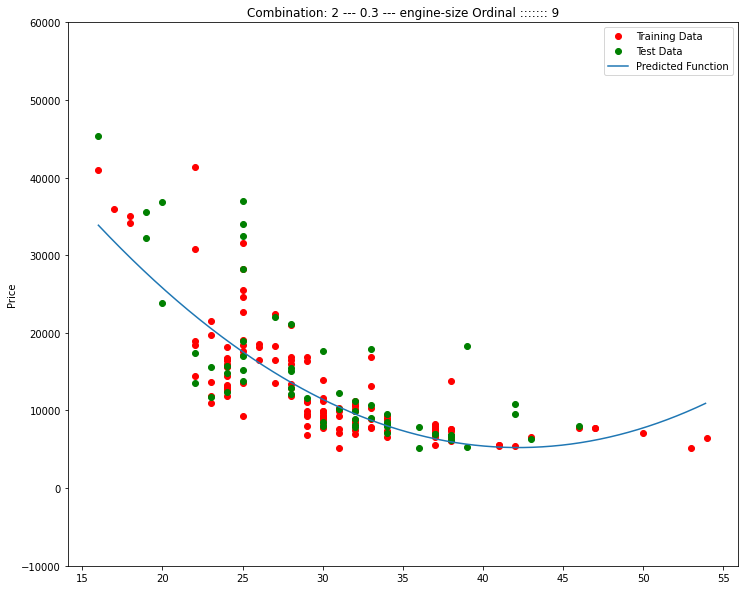

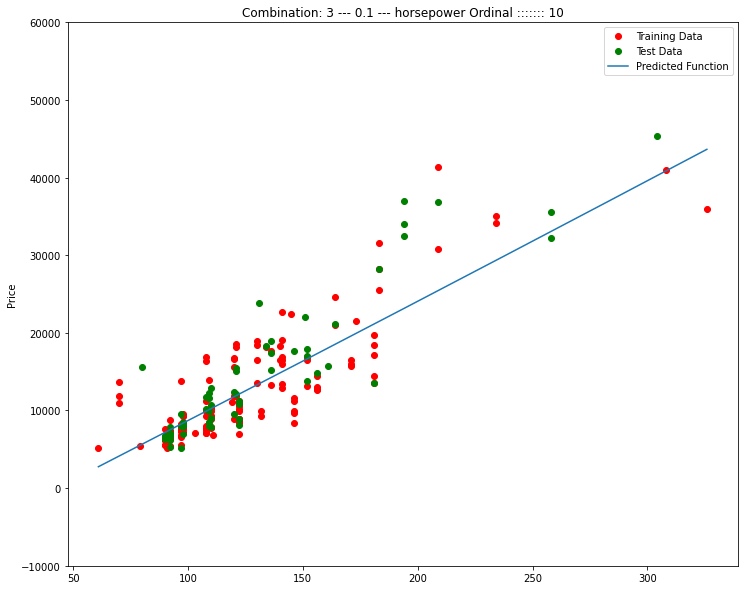

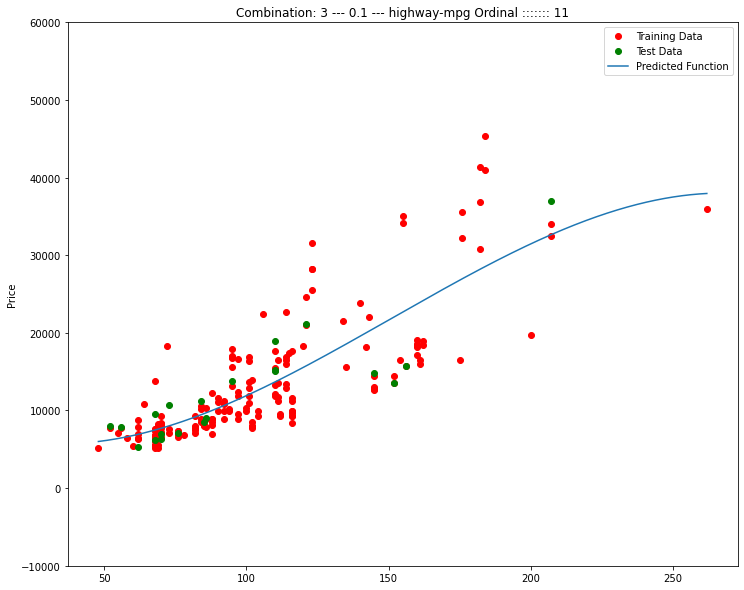

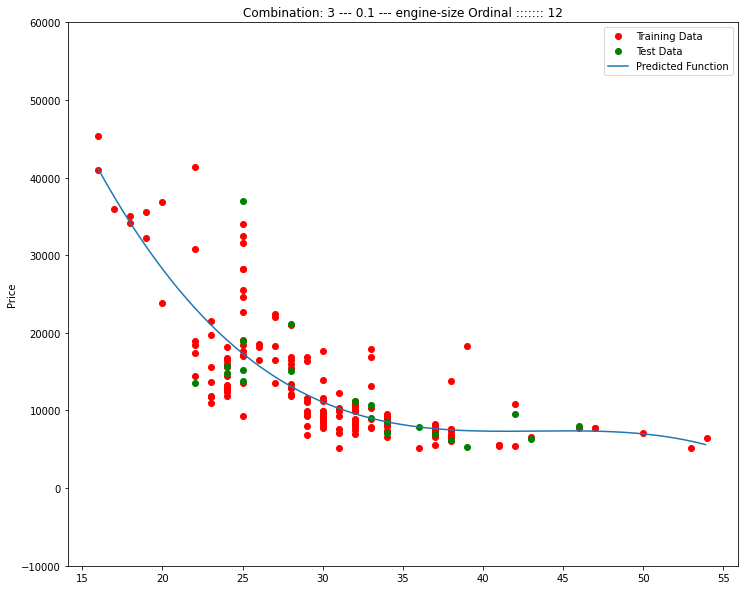

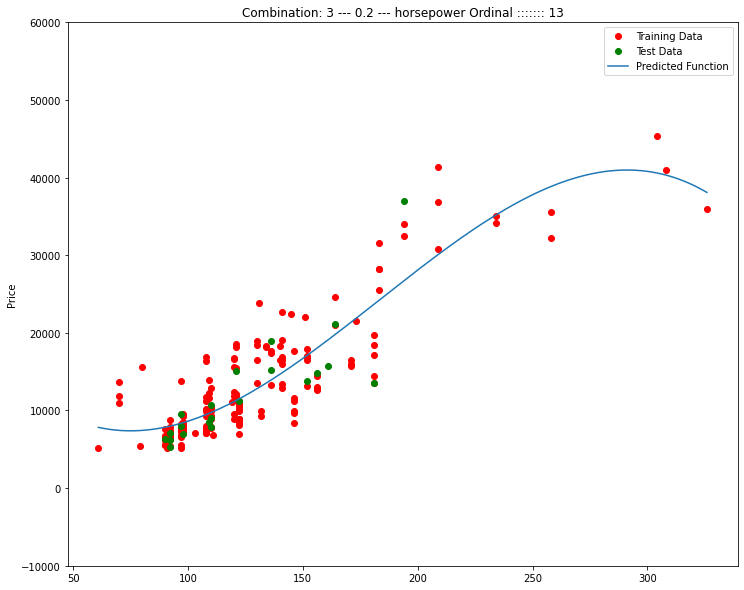

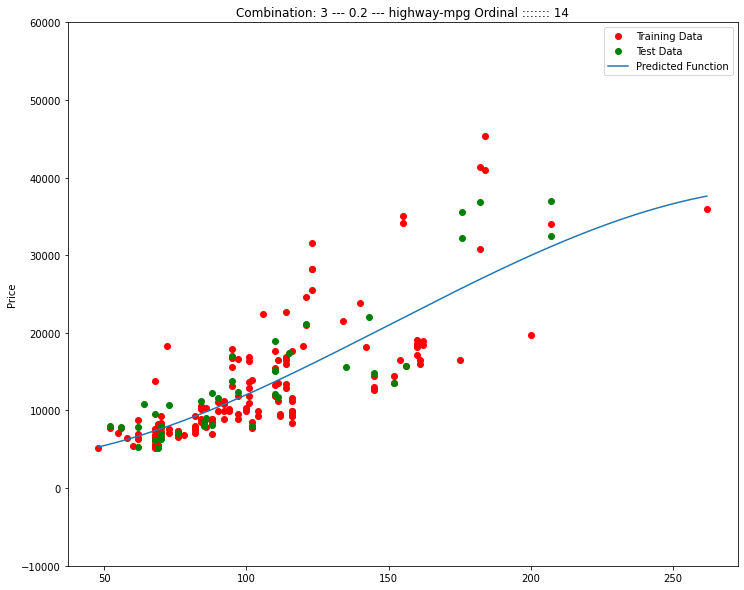

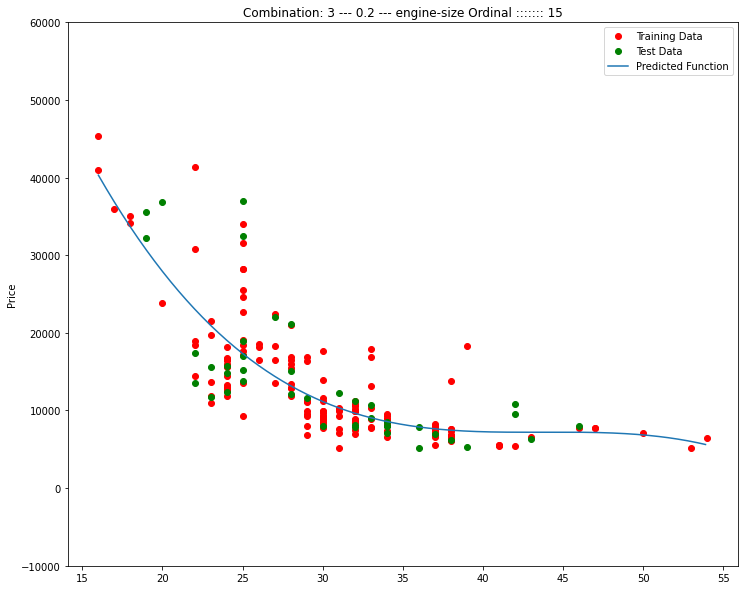

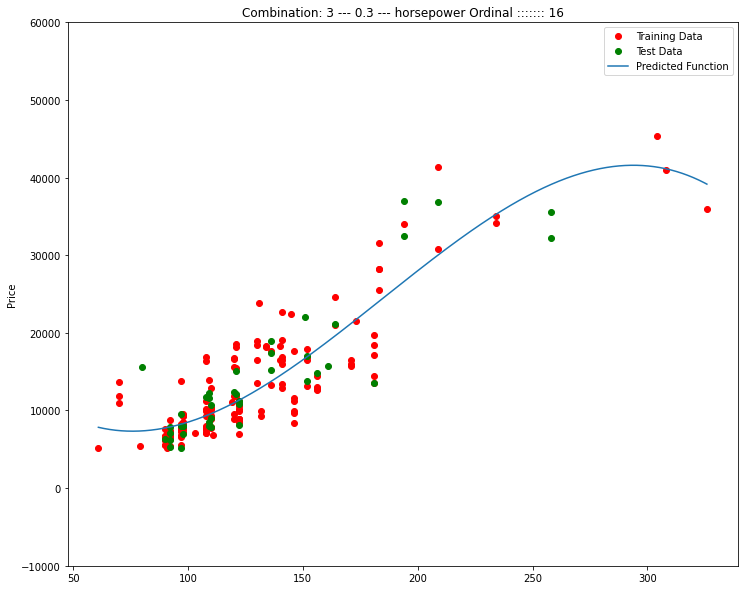

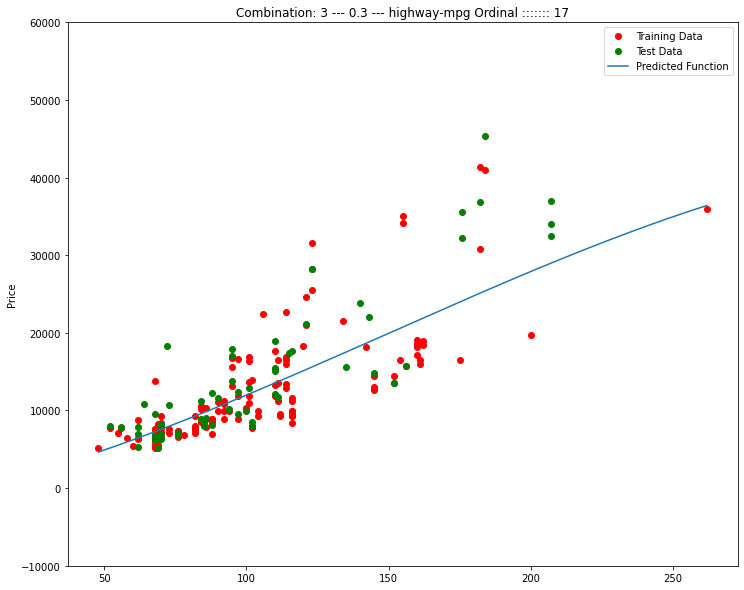

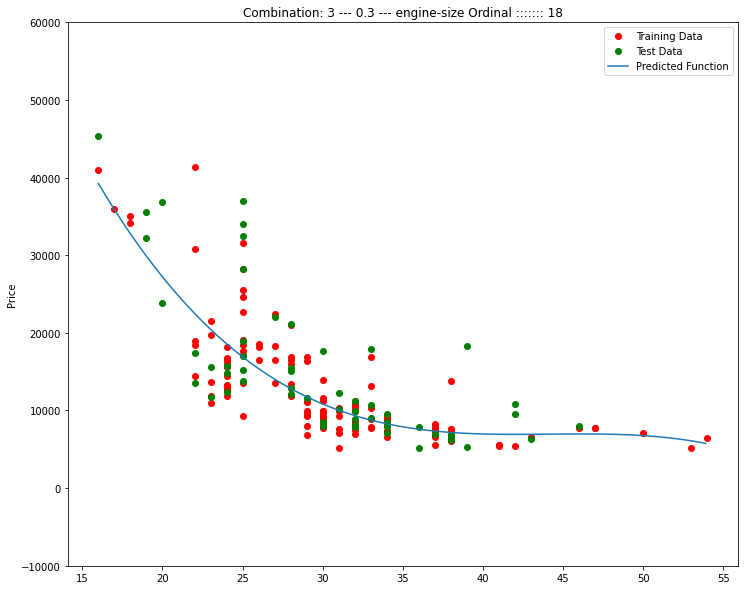

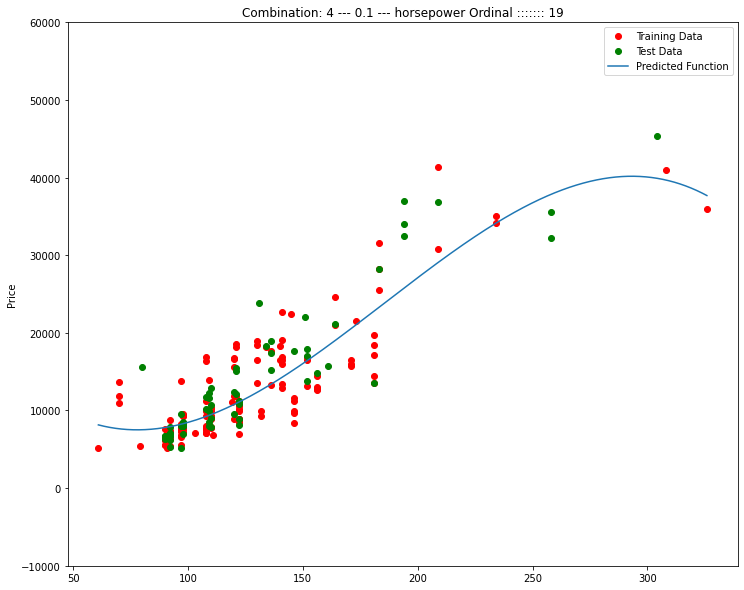

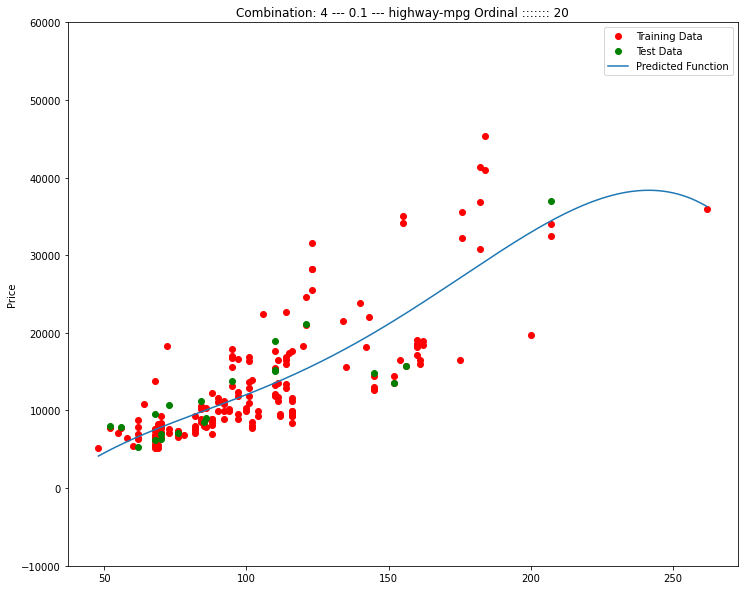

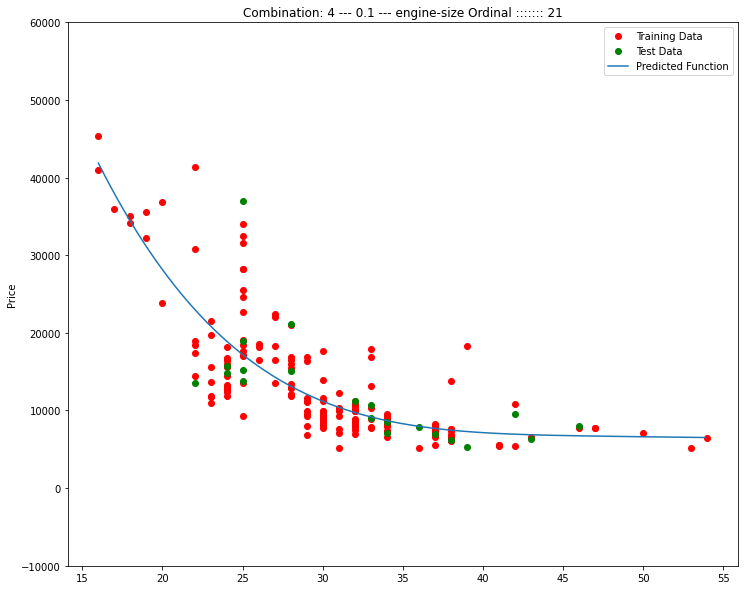

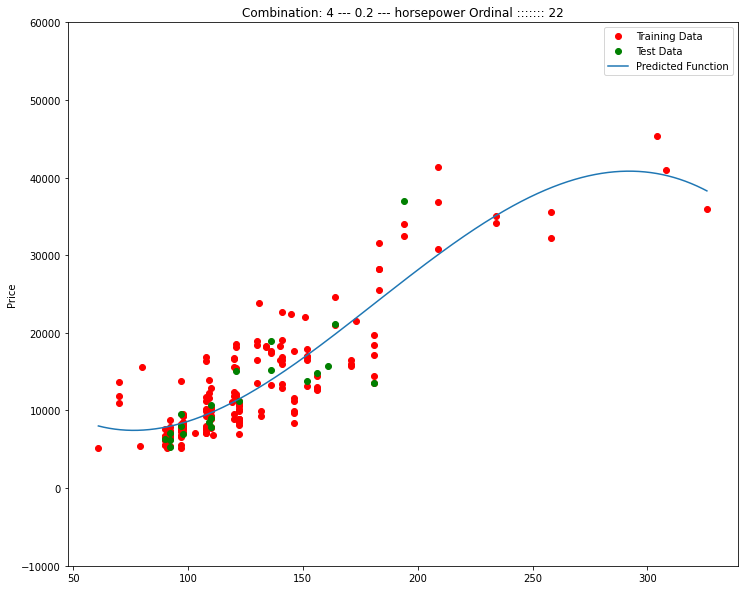

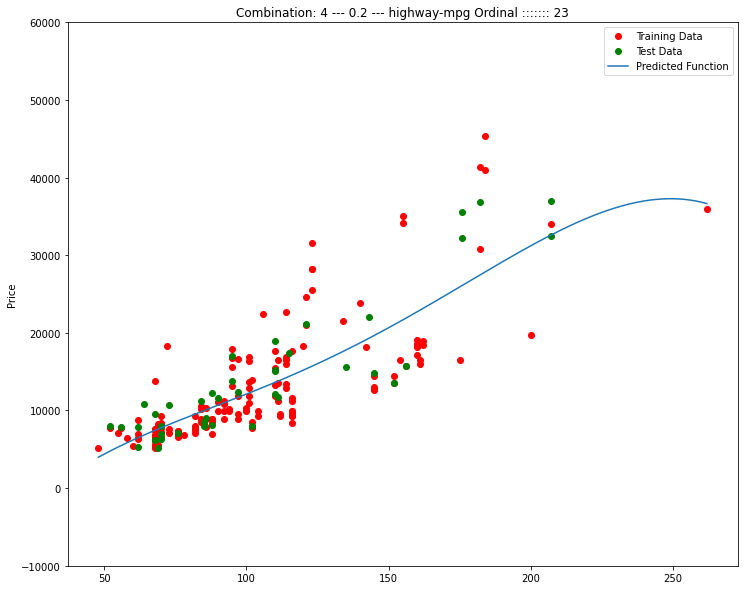

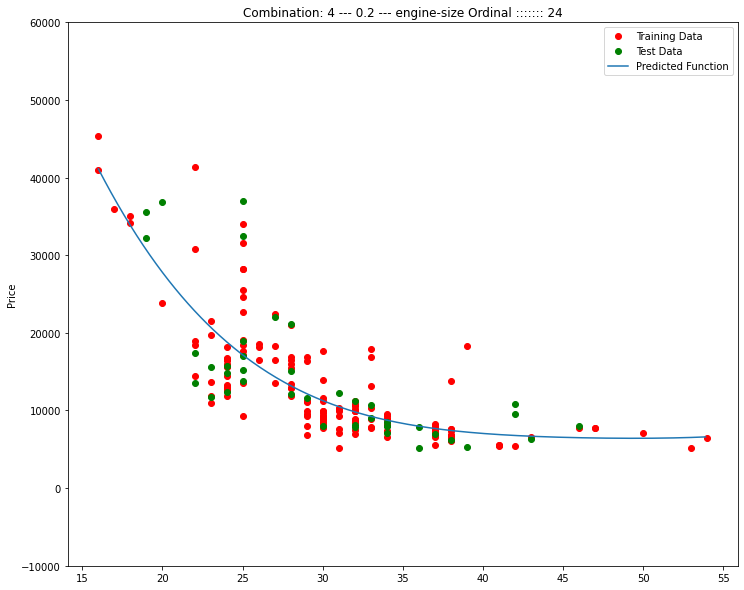

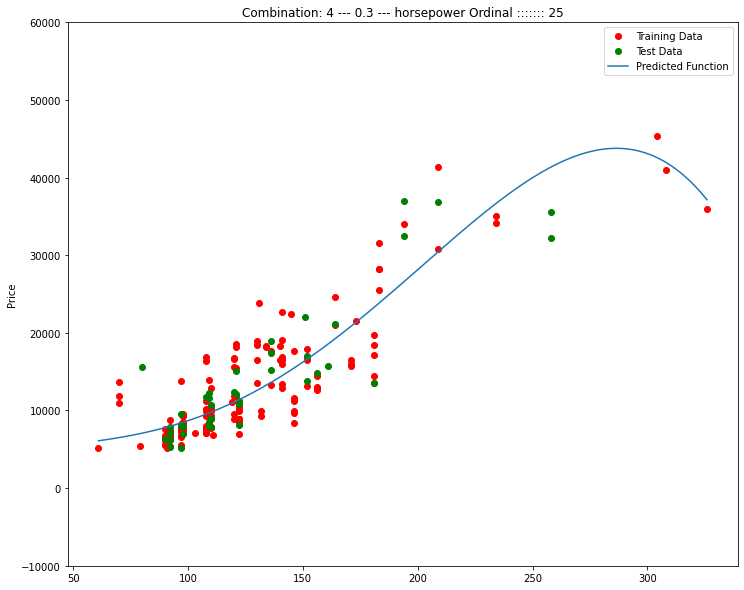

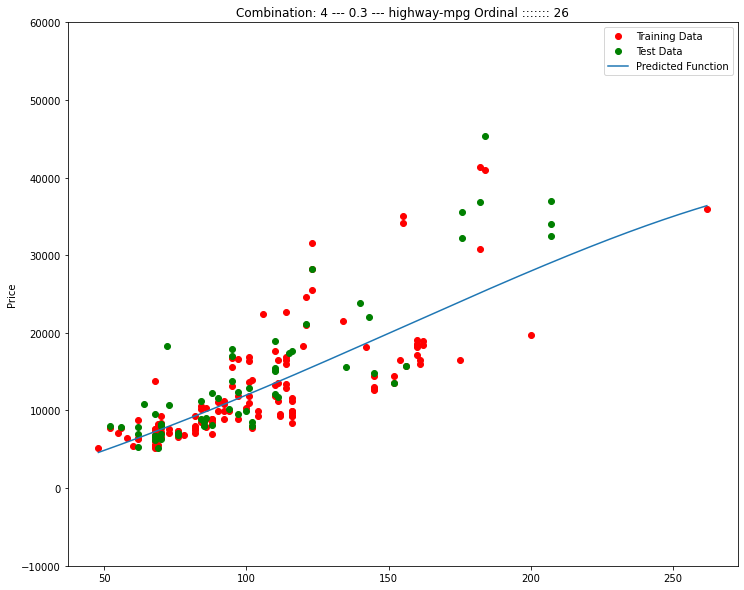

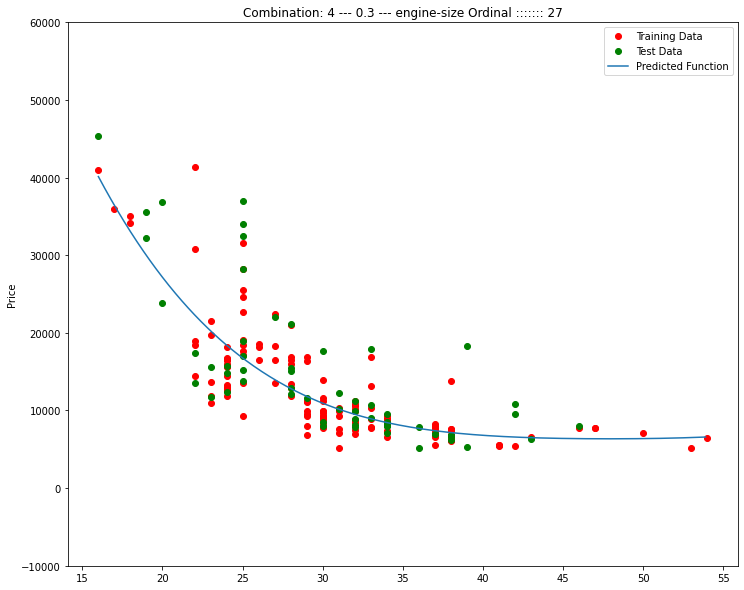

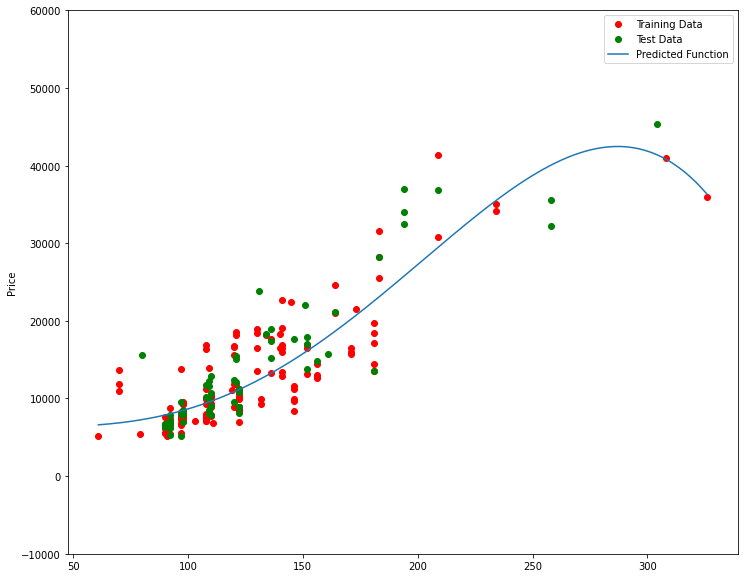

In [297]:
# Just Do It
counter = 0
ordinals = []
order = [2, 3, 4]
test_percentage = [0.1, 0.2, 0.3]
feature = ['horsepower', 'highway-mpg', 'engine-size']
for ord in order:
    for tst in test_percentage:
        for ftr in feature:
            ordinals.append(counter)
            counter+=1
            go_crazy(ord, tst, ftr, counter)

Text(0.5, 1.0, 'R^2 Using Test Data')

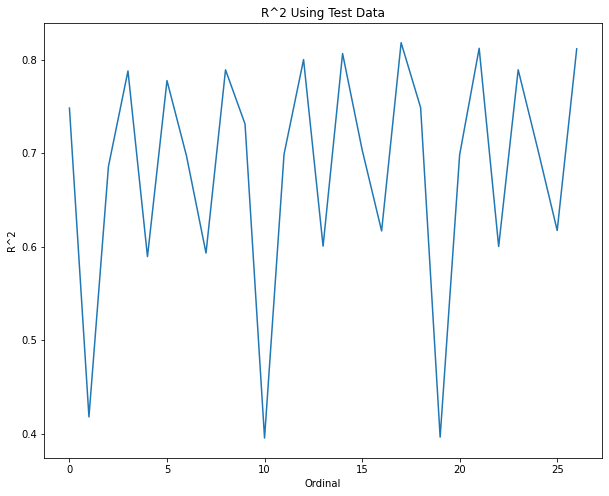

In [298]:

plt.figure(figsize=(width, height))
plt.plot(ordinals, ar_skvers)
plt.xlabel('Ordinal')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

In [299]:
print("The best performing model has an R^2 value of: ", max(ar_skvers), 'and the position of that combination is: ', ar_skvers.index(max(ar_skvers)))

The best performing model is:  0.8182465949684348 and the position of that combination is:  17
